# Hierarchical clustering
若是以下的 code 有不清楚的部分，請參考[連結](https://haojunsui.github.io/2016/07/16/scipy-hac/)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

variables = ['X', 'Y', 'Z']
labels = ['ID_'+str(i) for i in range(5)]
print(labels)

['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']


In [23]:
# set seed to remain the same sample numbers
np.random.seed(42)
X = np.random.random_sample([len(labels), len(variables)])
df = pd.DataFrame(X, columns=variables, index=labels)

In [24]:
df

,X,Y,Z
ID_0,0.374540,0.950714,0.731994
ID_1,0.598658,0.156019,0.155995
ID_2,0.058084,0.866176,0.601115
ID_3,0.708073,0.020584,0.969910
ID_4,0.832443,0.212339,0.181825


### 1. build distance matrix by calculating pairwise distance

In [4]:
### 1. distance matrix 
from scipy.spatial.distance import pdist

In [5]:
# pairwise distance
# 我們有五個樣本，每兩兩成對計算距離，會得到 10 個距離 (C 5 取 2 = 10)
row_dist = pdist(df, metric='euclidean')
row_dist

array([ 1.00675001,  0.35273321,  1.01636084,  1.02837666,  0.99733501,
        0.83232927,  0.24185582,  1.12850367,  1.09678572,  0.82055806])

### 2. build hierarchy

In [6]:
from scipy.cluster.hierarchy import linkage

#### 2.1 build from the pairwise distance array, row_dist

In [7]:
hc = linkage(row_dist, 
             method='complete')

In [8]:
# row: [idx_first, idx_second, distance, sample count]
# 第一步:算法決定合併第 1 群與 第 4 群，因為這兩群彼此的距離為 0.24，總共合併了兩個 sample
# 第二步:算法決定合併第 0 群與 第 2 群，因為這兩群彼此的距離為 0.35，總共合併了兩個 sample
# 第三步:算法決定合併第 3 群與 第 5 群 (這邊請注意，原先 data 只有五群資料，第 0 群到 第 4 群。所以這邊要合併的第 5 群，指得是第一步合併的那群
# 第四步:算法決定合併第 6 群與 第 7 群 (同理，這邊指的是，合併第二步那群 與 第三步的那群)

# 以上就是階層分析的步驟，看下方 dendrogram 的圖會更清楚
hc

array([[ 1.        ,  4.        ,  0.24185582,  2.        ],
       [ 0.        ,  2.        ,  0.35273321,  2.        ],
       [ 3.        ,  5.        ,  0.83232927,  3.        ],
       [ 6.        ,  7.        ,  1.12850367,  5.        ]])

#### 2.2 build from the original data
you will need to defind the distance metric


In [9]:
hc = linkage(df.values,
             method='complete',
             metric='euclidean')

In [10]:
# same result as feed the row_dist
hc

array([[ 1.        ,  4.        ,  0.24185582,  2.        ],
       [ 0.        ,  2.        ,  0.35273321,  2.        ],
       [ 3.        ,  5.        ,  0.83232927,  3.        ],
       [ 6.        ,  7.        ,  1.12850367,  5.        ]])

### 3. Dendrogram

In [30]:
?dendrogram

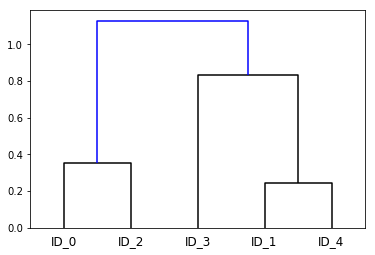

In [32]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import set_link_color_palette

# 繪製樹狀圖，藍色線 代表這兩群的距離超過某個限度，可自己定義 color_threshold
set_link_color_palette(['black'])

row_dendr = dendrogram(hc,
                       labels=labels,
                       color_threshold=0.9 #可改動，看看線的顏色變化
                      )

### 4. Decide the number of clusters by various criteria
決定分群的結果

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [34]:
?fcluster

In [36]:
# 不同的　criterion 會有不同的參數，t=3，限制最多分成三群
# ID_0 與 ID_2 被分為第一群
# ID_1 與 ID_4 被分為第二群
# ID_3 則是獨立一群
fcluster(hc, criterion='maxclust', t=3)

array([1, 2, 1, 3, 2], dtype=int32)

In [37]:
fcluster(hc, criterion='distance', t=0.5)

array([1, 2, 1, 3, 2], dtype=int32)